In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
beh = pd.read_csv("data/behaviorals.csv")
beh.head()

,Unnamed: 0,IDs,Age,Sex,ACE_Score,APQ_P_Total,APQ_SR_Total,ARI_P_Total_Score,ARI_S_Total_Score,ASSQ_Total,...,DX_10_PRem,DX_10_Past_Doc,DX_10_Presum,DX_10_RC,DX_10_Rem,DX_10_RuleOut,DX_10_Spec,DX_10_Sub,DX_10_Time,NoDX
0,1,NDARAA075AMK,6.728040,1,NaN,91.0,123.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,2,NDARAA112DMH,5.545744,0,NaN,NaN,NaN,3.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,3,NDARAA117NEJ,7.475929,0,NaN,113.0,95.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,4,NDARAA306NT2,21.216746,1,NaN,89.0,143.0,1.0,1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,5,NDARAA504CRN,9.165297,1,NaN,82.0,88.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [3]:
foof = pd.read_csv("data/foof2features.csv")
foof.head()
foof = foof.rename(columns={"id": "IDs"})


In [4]:
foof

,IDs,intercept,slope
0,NDARAA075AMK,0.986272,1.825774
1,NDARAA112DMH,1.486650,1.888544
2,NDARAA117NEJ,1.593155,2.095749
3,NDARAA947ZG5,0.703331,1.724831
4,NDARAA948VFH,0.918020,1.749441
...,...,...,...
2037,NDARZN277NR6,1.351549,1.996940
2038,NDARZN578YDP,1.380795,2.036327
2039,NDARZN610GTY,0.339229,1.050644
2040,NDARZN677EYE,0.781225,1.470061


In [5]:
# pandas count distinct values in column
beh['DX_01'].value_counts()


beh['DX_01_Cat'].value_counts()

Neurodevelopmental Disorders                                  1983
Anxiety Disorders                                              340
No Diagnosis Given                                             282
No Diagnosis Given: Incomplete Eval                            137
Depressive Disorders                                           129
Disruptive, Impulse Control and Conduct Disorders               63
Trauma and Stressor Related Disorders                           46
Elimination Disorders                                           27
Obsessive Compulsive and Related Disorders                      25
Other Conditions That May Be a Focus of Clinical Attention      16
Bipolar and Related Disorders                                    8
Schizophrenia Spectrum and other Psychotic Disorders             4
Neurocognitive Disorders                                         3
Feeding and Eating Disorders                                     3
Substance Related and Addictive Disorders                     

In [6]:
#merge 2 tables together
df = pd.merge( foof, beh, on='IDs', how='inner')


In [7]:
df.head()

,IDs,intercept,slope,Unnamed: 0,Age,Sex,ACE_Score,APQ_P_Total,APQ_SR_Total,ARI_P_Total_Score,...,DX_10_PRem,DX_10_Past_Doc,DX_10_Presum,DX_10_RC,DX_10_Rem,DX_10_RuleOut,DX_10_Spec,DX_10_Sub,DX_10_Time,NoDX
0,NDARAA075AMK,0.986272,1.825774,1,6.728040,1,NaN,91.0,123.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NDARAA112DMH,1.486650,1.888544,2,5.545744,0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,NDARAA117NEJ,1.593155,2.095749,3,7.475929,0,NaN,113.0,95.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,NDARAA947ZG5,0.703331,1.724831,7,13.627880,0,NaN,85.0,88.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,NDARAA948VFH,0.918020,1.749441,8,7.982660,1,NaN,91.0,91.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [8]:
print(df['DX_01'].value_counts()[:4].index.tolist())


['ADHD-Inattentive Type', 'ADHD-Combined Type', 'No Diagnosis Given', 'Autism Spectrum Disorder']


In [9]:
categories = 7
df2 = df.loc[df['DX_01'].isin(df['DX_01'].value_counts()[:categories].index.tolist())]
print(df2['DX_01'])


0                 No Diagnosis Given
1                 ADHD-Combined Type
2                 ADHD-Combined Type
3                 ADHD-Combined Type
4                 ADHD-Combined Type
                    ...             
1923              No Diagnosis Given
1925    Generalized Anxiety Disorder
1926              ADHD-Combined Type
1928           ADHD-Inattentive Type
1929           ADHD-Inattentive Type
Name: DX_01, Length: 1404, dtype: object


In [10]:
print(df2['DX_01'].value_counts())

ADHD-Inattentive Type                                    388
ADHD-Combined Type                                       376
No Diagnosis Given                                       203
Autism Spectrum Disorder                                 141
Specific Learning Disorder with Impairment in Reading    134
Generalized Anxiety Disorder                             100
Major Depressive Disorder                                 62
Name: DX_01, dtype: int64


In [11]:
df2.head()

,IDs,intercept,slope,Unnamed: 0,Age,Sex,ACE_Score,APQ_P_Total,APQ_SR_Total,ARI_P_Total_Score,...,DX_10_PRem,DX_10_Past_Doc,DX_10_Presum,DX_10_RC,DX_10_Rem,DX_10_RuleOut,DX_10_Spec,DX_10_Sub,DX_10_Time,NoDX
0,NDARAA075AMK,0.986272,1.825774,1,6.728040,1,NaN,91.0,123.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NDARAA112DMH,1.486650,1.888544,2,5.545744,0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,NDARAA117NEJ,1.593155,2.095749,3,7.475929,0,NaN,113.0,95.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,NDARAA947ZG5,0.703331,1.724831,7,13.627880,0,NaN,85.0,88.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,NDARAA948VFH,0.918020,1.749441,8,7.982660,1,NaN,91.0,91.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [12]:
#lets run classification with the 2 features only :  intercept and slope

### here the features and labels:
X = df2[['intercept', 'slope']].to_numpy()
y = df2['DX_01'].to_numpy()

In [13]:
X.shape

(1404, 2)

## CLASSIFIERS:

In [14]:
#stochastic gradient descent
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)
#print(X.shape)
clf.fit(X, y)
#print(y[0:5])
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.08896797 0.27758007 0.14590747 0.27402135 0.14285714]


In [15]:
#SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.30960854 0.35231317 0.3024911  0.33807829 0.27857143]


In [16]:
# decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)
                            


array([0.22695035, 0.22695035, 0.24822695, 0.14184397, 0.16428571,
       0.15714286, 0.2       , 0.13571429, 0.13571429, 0.17142857])

## Dealing with inbalanced dataset:

In [17]:
#pip install imbalanced-learn

In [18]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


Counter({'ADHD-Inattentive Type': 388, 'ADHD-Combined Type': 376, 'No Diagnosis Given': 203, 'Autism Spectrum Disorder': 141, 'Specific Learning Disorder with Impairment in Reading': 134, 'Generalized Anxiety Disorder': 100, 'Major Depressive Disorder': 62})


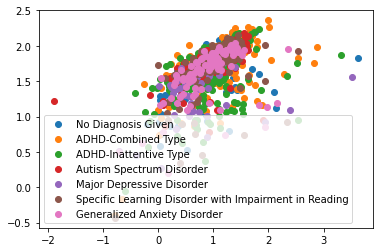

In [19]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Next, we oversample the minority class using SMOTE and plot the transformed dataset:


## SMOTE for Classification



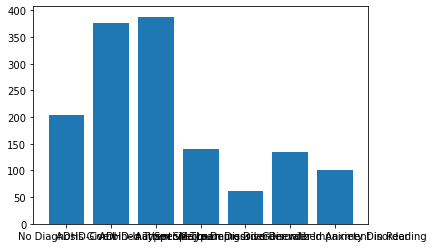

In [20]:
# load and summarize the dataset
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [21]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({'No Diagnosis Given': 388, 'ADHD-Combined Type': 388, 'ADHD-Inattentive Type': 388, 'Autism Spectrum Disorder': 388, 'Major Depressive Disorder': 388, 'Specific Learning Disorder with Impairment in Reading': 388, 'Generalized Anxiety Disorder': 388})


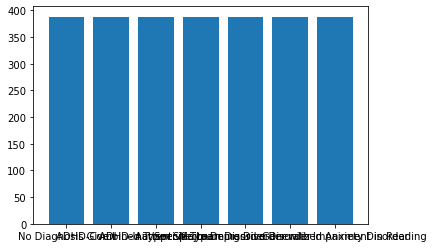

In [22]:
#summarize the oversampled distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Cost-Sensitive Learning for Multi-Class Classification



In [23]:
# cost sensitive random forest with default class weights
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define the model
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.407 (0.018)
